In [11]:
import numpy as np
import os
import seaborn as sns

In [12]:
data_file='GB_node_array.npy'
GB_node_array= np.load(data_file, allow_pickle=True)

In [13]:
!ls

 GB_node_array.npy	    test.txt	       trust.txt
'Granular Analysis.ipynb'   train.txt	       valid.txt
 rating.txt		    trustnetwork.txt   weighted_trust.txt


In [14]:
class TreeNode:
    def __init__(self, value,qity=None, is_center=True):
        self.value = value  # Center value or leaf value
        self.children = []
        self.qity=qity
        self.is_center = is_center  # To distinguish between center and leaf nodes

    def add_child(self, child_node):
        self.children.append(child_node)
def build_recursive_tree(cluster_data):
    root = TreeNode("Root", is_center=True)  # Root node

    def add_cluster_to_tree(cluster, parent_node):
        center_value,qity = cluster[1]  # Center node value
        center_node = TreeNode(center_value,qity, is_center=True)
        parent_node.add_child(center_node)

        for sub_cluster in cluster[0]:  # Check for sub-clusters
            if isinstance(sub_cluster, tuple):  # If it's a tuple, it's a cluster
                add_cluster_to_tree(sub_cluster, center_node)
            else:  # If it's a node, it's a leaf
                value=sub_cluster[:-1]
                _,qity=sub_cluster[-1]
                leaf_node = TreeNode(value, qity, is_center=False)
                center_node.add_child(leaf_node)

    for cluster in cluster_data:
        add_cluster_to_tree(cluster, root)

    return root

In [15]:
GB_node_list = [tuple(item) for item in GB_node_array]

tree = build_recursive_tree(GB_node_list)

In [16]:
GB_flatten=[]

In [17]:
def flatten__tree(node, centers=[]):
    #print(" " * level + str(node.value))  # Print node value
    if isinstance(node.value, list):
        GB_flatten.append((node.value, centers+[(None, node.qity)]))
    else:
        for child in node.children:
            flatten__tree(child, centers+[(node.value, node.qity)])

In [18]:
flatten__tree(tree)

In [19]:
GB_node_len_orin=[len(GB[0]) for GB in GB_flatten]

In [20]:
sorted(GB_node_len_orin, reverse=True)

[7567,
 7036,
 7023,
 7016,
 6962,
 6874,
 6830,
 6797,
 6792,
 6775,
 6765,
 6719,
 6637,
 6620,
 6615,
 6609,
 6604,
 6589,
 6582,
 6576,
 6571,
 6553,
 6340,
 6299,
 6261,
 6189,
 6155,
 6141,
 6123,
 6014,
 6008,
 5996,
 5993,
 5989,
 5989,
 5987,
 5963,
 5943,
 5938,
 5901,
 5889,
 5882,
 5859,
 5835,
 5827,
 5821,
 5801,
 5789,
 5787,
 5740,
 5558,
 5511,
 5298,
 4894,
 4801,
 4792,
 4775,
 4649,
 4534,
 4525,
 4506,
 4462,
 4413,
 4376,
 4369,
 4363,
 4354,
 4331,
 4316,
 4301,
 4255,
 4251,
 4245,
 4203,
 4179,
 4159,
 4133,
 4062,
 4028,
 4006,
 3976,
 3973,
 3956,
 3930,
 3852,
 3726,
 3725,
 3708,
 3684,
 3445,
 3444,
 3434,
 3392,
 3386,
 3385,
 3367,
 3361,
 3144,
 3137,
 3029,
 2994,
 2993,
 2984,
 2975,
 2964,
 2955,
 2952,
 2921,
 2911,
 2900,
 2868,
 2858,
 2852,
 2852,
 2831,
 2827,
 2826,
 2816,
 2802,
 2790,
 2786,
 2785,
 2776,
 2774,
 2773,
 2750,
 2749,
 2747,
 2730,
 2716,
 2693,
 2681,
 2648,
 2622,
 2578,
 2572,
 2569,
 2566,
 2564,
 2561,
 2559,
 2549,
 2546,

<AxesSubplot:ylabel='Count'>

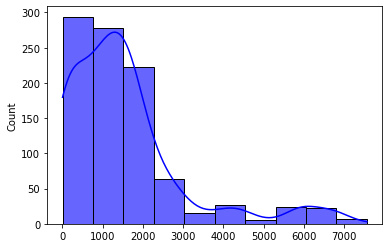

In [21]:
sns.histplot(GB_node_len_orin, bins=10, kde=True, color='blue', alpha=0.6)

In [22]:
GB_node_len=[len([node for node in GB[0] if node<13177]) for GB in GB_flatten]

In [28]:
GB_node_len[0], GB_flatten[0][1:]

(585,
 ([('Root', None),
   (25, 0.010659163),
   (219, 0.009694973),
   (10201, 0.009322009),
   (815, 0.010838595),
   (6175, 0.020224718),
   (4322, 0.08888889),
   0.08888889],))

In [24]:
sorted(GB_node_len,reverse=True)

[919,
 796,
 585,
 390,
 355,
 341,
 228,
 174,
 174,
 168,
 145,
 140,
 130,
 126,
 124,
 123,
 112,
 109,
 106,
 102,
 99,
 94,
 94,
 93,
 86,
 79,
 77,
 74,
 70,
 68,
 68,
 65,
 61,
 60,
 59,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 56,
 53,
 53,
 52,
 52,
 50,
 48,
 48,
 47,
 46,
 46,
 46,
 45,
 45,
 45,
 43,
 43,
 42,
 41,
 40,
 40,
 40,
 39,
 38,
 38,
 37,
 37,
 35,
 35,
 34,
 33,
 33,
 33,
 33,
 32,
 32,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 28,
 28,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,


In [34]:
len(GB_node_len)

412

In [35]:
len([node_len for node_len in GB_node_len if node_len<3])

139

<AxesSubplot:ylabel='Count'>

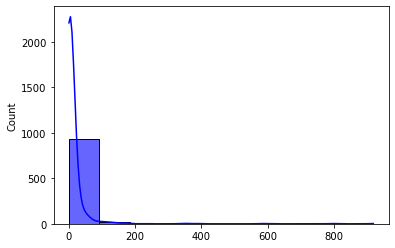

In [25]:
sns.histplot(GB_node_len, bins=10, kde=True, color='blue', alpha=0.6)

In [17]:
len(GB_node_len)

417

In [18]:
len(GB_node_len)

417

In [19]:
max(GB_node_len)

3288

In [160]:
len(GB_node_array[1][0])

2

In [161]:
len([length for length in GB_node_len if length==2])

144

In [162]:
GB_node_array[1][0][1]

([([([([([[293,
           907,
           1035,
           1349,
           2372,
           2894,
           4276,
           4546,
           6853,
           8915,
           9016,
           9809,
           10029,
           10209,
           10571,
           10699,
           10790,
           10802,
           10881,
           11423,
           11688,
           11702,
           11756,
           13178,
           13185,
           13189,
           13193,
           13196,
           13198,
           13205,
           13209,
           13210,
           13214,
           13218,
           13228,
           13229,
           13236,
           13237,
           13238,
           13243,
           13253,
           13256,
           13258,
           13260,
           13268,
           13269,
           13278,
           13281,
           13292,
           13293,
           13296,
           13301,
           13303,
           13304,
           13305,
           13306,
      